Coefficients: [-0.02671937]
Mean squared error: 1.3081058483312469
Coefficient of determination (R^2): 0.0017575657278725565


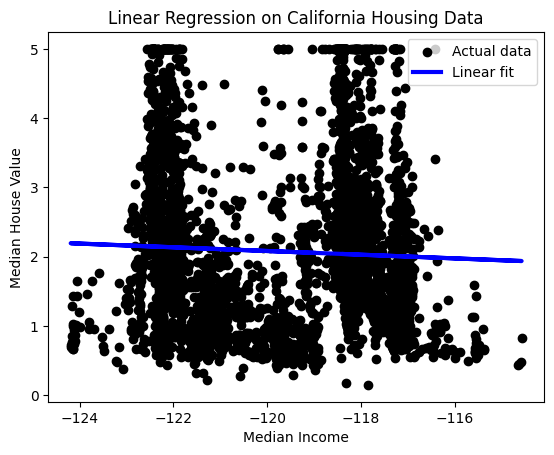

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

housing = fetch_california_housing()

# For simplicity, use only one feature: 'Median Income'
X = housing.data[:, np.newaxis, 7]  # 7th column is 'Median Income'
y = housing.target

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients:', regr.coef_)

# The mean squared error
print('Mean squared error:', np.mean((y_pred - y_test) ** 2))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (R^2):', r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Linear fit')

plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Linear Regression on California Housing Data')
plt.legend()
plt.show()


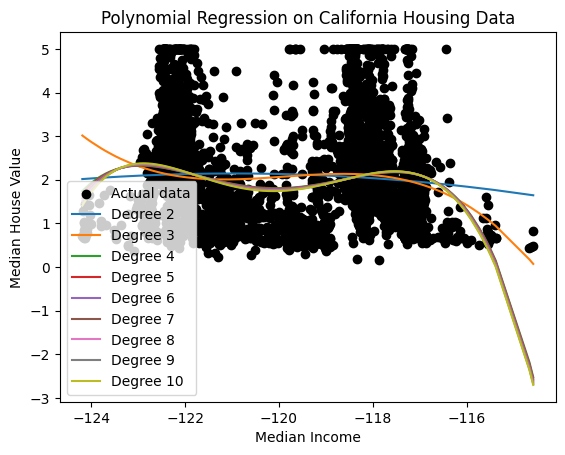

Mean Squared Error for each polynomial degree:
Degree 2: MSE = 1.3079454099754901
Degree 3: MSE = 1.2820612523678467
Degree 4: MSE = 1.2375126167536452
Degree 5: MSE = 1.2351021493031762
Degree 6: MSE = 1.2326371638540297
Degree 7: MSE = 1.2301243154180133
Degree 8: MSE = 1.2275705817419713
Degree 9: MSE = 1.2249831636874562
Degree 10: MSE = 1.2223693396857367


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import operator  # Importing the operator module

# Load the California housing dataset
housing = fetch_california_housing()
X = housing.data[:, np.newaxis, 7]  # Using 'Median Income' as the feature
y = housing.target  # Median House Value as the target

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up polynomial degrees to test
degrees = [2, 3, 4,5,6,7,8,9,10]

# Dictionary to store MSE for each degree
mse_dict = {}

# Plotting the actual data
plt.scatter(X_test, y_test, color='black', label='Actual data')

# Iterating over specified degrees to create polynomial regression models
for degree in degrees:
    # Creating a pipeline that first transforms features into polynomial features, then fits LinearRegression
    polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    # Training the model
    polynomial_model.fit(X_train, y_train)

    # Predicting on the testing set
    y_pred = polynomial_model.predict(X_test)

    # Calculating and storing MSE
    mse_dict[degree] = mean_squared_error(y_test, y_pred)

    # Sorting X_test and y_pred for plotting
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(X_test, y_pred), key=sort_axis)
    X_test_sorted, y_pred_sorted = zip(*sorted_zip)

    # Plotting polynomial regression lines
    plt.plot(X_test_sorted, y_pred_sorted, label=f'Degree {degree}')

# Adding labels and title to the plot
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Polynomial Regression on California Housing Data')
plt.legend()
plt.show()

# Printing MSE for each polynomial degree
print("Mean Squared Error for each polynomial degree:")
for degree, mse in mse_dict.items():
    print(f"Degree {degree}: MSE = {mse}")


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import numpy as np

# Load the dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a dictionary to store the results
results = {
    'Linear': {'r2_score': None, 'mse': None},
    'Ridge': {},
    'Lasso': {}
}

# Regularization strengths
lambdas = [0.001, 0.01, 0.1, 1, 10]

# Train and evaluate a baseline Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
results['Linear']['r2_score'] = r2_score(y_test, y_pred_linear)
results['Linear']['mse'] = mean_squared_error(y_test, y_pred_linear)

# Function to train and evaluate models with regularization
def train_eval_model(Model, lambdas, X_train, y_train, X_test, y_test, model_name):
    for lam in lambdas:
        model = Model(alpha=lam)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[model_name][lam] = {
            'r2_score': r2_score(y_test, y_pred),
            'mse': mean_squared_error(y_test, y_pred),
            'coefficients': model.coef_
        }

# Evaluate Ridge and Lasso models with different regularization strengths
train_eval_model(Ridge, lambdas, X_train, y_train, X_test, y_test, 'Ridge')
train_eval_model(Lasso, lambdas, X_train, y_train, X_test, y_test, 'Lasso')

# Display results
for model in ['Linear', 'Ridge', 'Lasso']:
    print(f"Results for {model} Regression:")
    if model == 'Linear':
        print(f"  R2 Score: {results['Linear']['r2_score']}")
        print(f"  MSE: {results['Linear']['mse']}\n")
    else:
        for lam in lambdas:
            print(f"  Lambda: {lam}")
            print(f"    R2 Score: {results[model][lam]['r2_score']}")
            print(f"    MSE: {results[model][lam]['mse']}")
            print(f"    Coefficients: {results[model][lam]['coefficients']}\n")


Results for Linear Regression:
  R2 Score: 0.5757877060324524
  MSE: 0.5558915986952422

Results for Ridge Regression:
  Lambda: 0.001
    R2 Score: 0.5757877735520456
    MSE: 0.5558915102169611
    Coefficients: [ 4.48674745e-01  9.72425923e-03 -1.23323033e-01  7.83143175e-01
 -2.02961678e-06 -3.52631803e-03 -4.19792481e-01 -4.33708038e-01]

  Lambda: 0.01
    R2 Score: 0.5757883812044837
    MSE: 0.5558907139437504
    Coefficients: [ 4.48673266e-01  9.72427460e-03 -1.23320244e-01  7.83127587e-01
 -2.02958254e-06 -3.52631388e-03 -4.19792433e-01 -4.33707794e-01]

  Lambda: 0.1
    R2 Score: 0.5757944553633947
    MSE: 0.5558827543113783
    Coefficients: [ 4.48658477e-01  9.72442833e-03 -1.23292361e-01  7.82971747e-01
 -2.02924019e-06 -3.52627239e-03 -4.19791946e-01 -4.33705352e-01]

  Lambda: 1
    R2 Score: 0.5758549611440138
    MSE: 0.5558034669932196
    Coefficients: [ 4.48510924e-01  9.72596535e-03 -1.23014157e-01  7.81416761e-01
 -2.02581346e-06 -3.52585878e-03 -4.19786908e-0